LSTM

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
data = pd.read_csv("/content/On-street_Parking_Bay_Sensors (2).csv")

In [6]:
data

,bay_id,st_marker_id,status,location,lat,lon
0,1399,1581S,Unoccupied,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678
1,2242,3930N,Unoccupied,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629
2,6092,13251S,Unoccupied,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152
3,9064,9278N,Unoccupied,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903
4,8979,7891W,Unoccupied,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724
...,...,...,...,...,...,...
948,2643,10117W,Unoccupied,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955
949,4422,C7684,Unoccupied,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215
950,4086,C6286,Unoccupied,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789
951,4069,C6176,Unoccupied,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514


In [7]:
y = pd.get_dummies(data.status, prefix='status')


In [8]:
y

,status_Present,status_Unoccupied
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
948,0,1
949,0,1
950,0,1
951,0,1


In [9]:
data_new = data.append(y)

In [10]:
data_new

,bay_id,st_marker_id,status,location,lat,lon,status_Present,status_Unoccupied
0,1399.0,1581S,Unoccupied,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678,NaN,NaN
1,2242.0,3930N,Unoccupied,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629,NaN,NaN
2,6092.0,13251S,Unoccupied,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152,NaN,NaN
3,9064.0,9278N,Unoccupied,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903,NaN,NaN
4,8979.0,7891W,Unoccupied,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724,NaN,NaN
...,...,...,...,...,...,...,...,...
948,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
949,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
950,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
951,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [11]:
data_data = pd.concat([data, y], axis=1, join='inner')
display(data_data)

,bay_id,st_marker_id,status,location,lat,lon,status_Present,status_Unoccupied
0,1399,1581S,Unoccupied,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678,0,1
1,2242,3930N,Unoccupied,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629,0,1
2,6092,13251S,Unoccupied,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152,0,1
3,9064,9278N,Unoccupied,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903,0,1
4,8979,7891W,Unoccupied,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724,0,1
...,...,...,...,...,...,...,...,...
948,2643,10117W,Unoccupied,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955,0,1
949,4422,C7684,Unoccupied,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215,0,1
950,4086,C6286,Unoccupied,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789,0,1
951,4069,C6176,Unoccupied,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514,0,1


In [12]:
data_data.drop(columns=['status_Unoccupied'], axis = 1, inplace = True)

In [13]:
data_data

,bay_id,st_marker_id,status,location,lat,lon,status_Present
0,1399,1581S,Unoccupied,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678,0
1,2242,3930N,Unoccupied,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629,0
2,6092,13251S,Unoccupied,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152,0
3,9064,9278N,Unoccupied,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903,0
4,8979,7891W,Unoccupied,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724,0
...,...,...,...,...,...,...,...
948,2643,10117W,Unoccupied,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955,0
949,4422,C7684,Unoccupied,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215,0
950,4086,C6286,Unoccupied,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789,0
951,4069,C6176,Unoccupied,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514,0


In [14]:
data_data.drop(columns=['status'], axis = 1, inplace = True)

In [15]:
data_data

,bay_id,st_marker_id,location,lat,lon,status_Present
0,1399,1581S,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678,0
1,2242,3930N,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629,0
2,6092,13251S,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152,0
3,9064,9278N,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903,0
4,8979,7891W,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724,0
...,...,...,...,...,...,...
948,2643,10117W,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955,0
949,4422,C7684,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215,0
950,4086,C6286,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789,0
951,4069,C6176,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514,0


In [16]:
data_data = data_data.rename(columns={'status_Present': 'status'})

In [17]:
data_data

,bay_id,st_marker_id,location,lat,lon,status
0,1399,1581S,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678,0
1,2242,3930N,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629,0
2,6092,13251S,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152,0
3,9064,9278N,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903,0
4,8979,7891W,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724,0
...,...,...,...,...,...,...
948,2643,10117W,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955,0
949,4422,C7684,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215,0
950,4086,C6286,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789,0
951,4069,C6176,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514,0


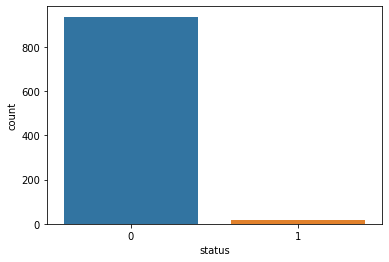

In [18]:
ax = sns.countplot(x="status", data=data_data)

In [19]:
print(data_data.nunique(axis=0))


bay_id          953
st_marker_id    953
location        953
lat             953
lon             953
status            2
dtype: int64


In [20]:
print(data_data.dtypes)

bay_id            int64
st_marker_id     object
location         object
lat             float64
lon             float64
status            uint8
dtype: object


In [21]:
df1 = data_data.reset_index()['status']


In [22]:
df1

0      0
1      0
2      0
3      0
4      0
      ..
948    0
949    0
950    0
951    0
952    0
Name: status, Length: 953, dtype: uint8

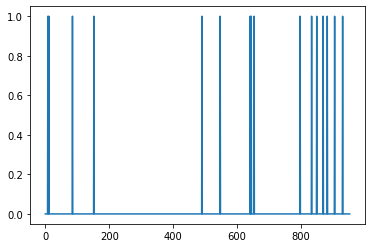

In [23]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [25]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [26]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [27]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
print(X_train.shape), print(y_train.shape)


(566, 100)
(566,)


(None, None)

In [29]:
print(X_test.shape), print(ytest.shape)


(185, 100)
(185,)


(None, None)

In [30]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Dense

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
history_LSTM = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
9/9 [==============================] - 9s 386ms/step - loss: 0.0107 - val_loss: 0.0377
Epoch 2/100
9/9 [==============================] - 2s 206ms/step - loss: 0.0105 - val_loss: 0.0371
Epoch 3/100
9/9 [==============================] - 2s 212ms/step - loss: 0.0105 - val_loss: 0.0374
Epoch 4/100
9/9 [==============================] - 2s 214ms/step - loss: 0.0105 - val_loss: 0.0374
Epoch 5/100
9/9 [==============================] - 2s 203ms/step - loss: 0.0104 - val_loss: 0.0375
Epoch 6/100
9/9 [==============================] - 2s 211ms/step - loss: 0.0105 - val_loss: 0.0375
Epoch 7/100
9/9 [==============================] - 2s 213ms/step - loss: 0.0105 - val_loss: 0.0377
Epoch 8/100
9/9 [==============================] - 2s 205ms/step - loss: 0.0104 - val_loss: 0.0374
Epoch 9/100
9/9 [==============================] - 2s 200ms/step - loss: 0.0105 - val_loss: 0.0374
Epoch 10/100
9/9 [==============================] - 2s 211ms/step - loss: 0.0105 - val_loss: 0.0377
Epoch 11/

In [35]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [36]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)



In [37]:
test_predict

array([[ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97644055e-03],
       [ 6.97643869e-03],
       [ 2.88765840e-02],
       [ 5.00998534e-02],
       [ 6.12277500e-02],
       [ 5.70037402e-02],
       [ 3.56761590e-02],
       [ 3.08323372e-03],
       [-2.41559837e-02],
       [-2.3

In [38]:
test_predict[test_predict > 0.05] = 1
test_predict[test_predict < 0.05] = 0

In [39]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict


In [40]:
test_predict.shape

(185, 1)

In [41]:
from sklearn import metrics

In [42]:
print(metrics.mean_absolute_error(ytest, test_predict))

0.16756756756756758


In [43]:
print(metrics.mean_squared_error(ytest, test_predict))

0.16756756756756758


In [44]:
print(np.sqrt(metrics.mean_squared_error(ytest, test_predict)))

0.4093501771925445


In [45]:
from sklearn.metrics import accuracy_score

In [46]:
LSTM_accuracy = accuracy_score(ytest, test_predict)

GRU

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [48]:
data = pd.read_csv("On-street_Parking_Bay_Sensors (2).csv")

In [49]:
y = pd.get_dummies(data.status, prefix='status')


In [50]:
data_data = pd.concat([data, y], axis=1, join='inner')
display(data_data)

,bay_id,st_marker_id,status,location,lat,lon,status_Present,status_Unoccupied
0,1399,1581S,Unoccupied,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678,0,1
1,2242,3930N,Unoccupied,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629,0,1
2,6092,13251S,Unoccupied,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152,0,1
3,9064,9278N,Unoccupied,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903,0,1
4,8979,7891W,Unoccupied,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724,0,1
...,...,...,...,...,...,...,...,...
948,2643,10117W,Unoccupied,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955,0,1
949,4422,C7684,Unoccupied,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215,0,1
950,4086,C6286,Unoccupied,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789,0,1
951,4069,C6176,Unoccupied,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514,0,1


In [51]:
data_data.drop(columns=['status_Unoccupied'], axis = 1, inplace = True)

In [52]:
data_data.drop(columns=['status'], axis = 1, inplace = True)

In [53]:
data_data = data_data.rename(columns={'status_Present': 'status'})

In [54]:
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12}) 
    plt.ylabel('Occupied or Not ($m³$/capita.day)', 
                                  {'fontsize': 12})

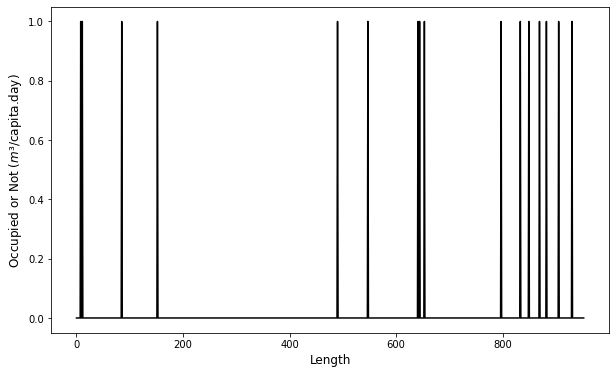

In [55]:
dataset = data_data.copy()
timeseries(data_data.index, dataset['status'], 'Length')

In [56]:
df = data_data.copy()

In [57]:
# Check for missing values
print('Total num of missing values:') 
print(df.status.isna().sum())
print('')


Total num of missing values:
0



In [58]:
# Keep WC and drop Date
df = df.drop(['bay_id', 'lat', 'lon', 'st_marker_id', 'location'], axis = 1)

In [59]:
# Split train data and test data
train_size = int(len(df)*0.80)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [60]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)


In [61]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 30
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape) 
print('y_test.shape:', y_test.shape)

X_train.shape: (732, 30, 1)
y_train.shape: (732, 1)
X_test.shape: (161, 30, 1)
y_test.shape: (161, 1)


In [62]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='sgd' ,loss='mse')
    return model
model_gru = create_gru(30)

In [63]:
def fit_model(model):
    #early_stop = keras.callbacks.EarlyStopping(monitor = ['val_acc','val_loss'],
                                               #patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.5,
                        batch_size = 32, shuffle = False)
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
12/12 [==============================] - 5s 116ms/step - loss: 0.0055 - val_loss: 0.0135
Epoch 2/100
12/12 [==============================] - 0s 41ms/step - loss: 0.0055 - val_loss: 0.0135
Epoch 3/100
12/12 [==============================] - 0s 40ms/step - loss: 0.0055 - val_loss: 0.0135
Epoch 4/100
12/12 [==============================] - 0s 41ms/step - loss: 0.0055 - val_loss: 0.0135
Epoch 5/100
12/12 [==============================] - 0s 41ms/step - loss: 0.0055 - val_loss: 0.0135
Epoch 6/100
12/12 [==============================] - 0s 41ms/step - loss: 0.0055 - val_loss: 0.0135
Epoch 7/100
12/12 [==============================] - 0s 42ms/step - loss: 0.0055 - val_loss: 0.0135
Epoch 8/100
12/12 [==============================] - 0s 39ms/step - loss: 0.0055 - val_loss: 0.0135
Epoch 9/100
12/12 [==============================] - 0s 42ms/step - loss: 0.0055 - val_loss: 0.0135
Epoch 10/100
12/12 [==============================] - 0s 42ms/step - loss: 0.0055 - val_loss: 0.013

In [64]:
print(history_gru.history.keys())


dict_keys(['loss', 'val_loss'])


In [65]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)


In [66]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 


In [67]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

In [68]:
prediction_gru

array([[0.00276635],
       [0.00276635],
       [0.00276635],
       [0.00276635],
       [0.00276635],
       [0.00276635],
       [0.034446  ],
       [0.05011572],
       [0.04992392],
       [0.04155496],
       [0.03110653],
       [0.02178071],
       [0.01467656],
       [0.00978099],
       [0.00665012],
       [0.00477035],
       [0.00370754],
       [0.00314433],
       [0.00286903],
       [0.0027498 ],
       [0.00270934],
       [0.0027049 ],
       [0.0027143 ],
       [0.00272699],
       [0.00273856],
       [0.00274764],
       [0.00275419],
       [0.00275866],
       [0.00276159],
       [0.00276346],
       [0.00276461],
       [0.00276531],
       [0.00276573],
       [0.00276598],
       [0.00276612],
       [0.00276621],
       [0.00276635],
       [0.00276635],
       [0.00276635],
       [0.00276635],
       [0.00276635],
       [0.00276635],
       [0.034446  ],
       [0.05011572],
       [0.04992392],
       [0.04155496],
       [0.03110653],
       [0.021

In [69]:
prediction_gru[prediction_gru < 0.001] = 1


In [70]:
prediction_gru[prediction_gru > 0.001] = 0

In [71]:
GRU_accuracy = accuracy_score(prediction_gru, y_test)

In [72]:
GRU_accuracy

0.9565217391304348

In [73]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Squared Error: {:.4f}'.format(mse))    
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(prediction_gru, y_test, 'GRU')

GRU:
Mean Squared Error: 0.0435
Mean Absolute Error: 0.0435
Root Mean Square Error: 0.2085



MLP

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
data = pd.read_csv("On-street_Parking_Bay_Sensors (2).csv")

In [77]:
y = pd.get_dummies(data.status, prefix='status')


In [78]:
data_data = pd.concat([data, y], axis=1, join='inner')
display(data_data)

,bay_id,st_marker_id,status,location,lat,lon,status_Present,status_Unoccupied
0,1399,1581S,Unoccupied,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678,0,1
1,2242,3930N,Unoccupied,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629,0,1
2,6092,13251S,Unoccupied,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152,0,1
3,9064,9278N,Unoccupied,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903,0,1
4,8979,7891W,Unoccupied,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724,0,1
...,...,...,...,...,...,...,...,...
948,2643,10117W,Unoccupied,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955,0,1
949,4422,C7684,Unoccupied,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215,0,1
950,4086,C6286,Unoccupied,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789,0,1
951,4069,C6176,Unoccupied,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514,0,1


In [79]:
data_data.drop(columns=['status_Unoccupied'], axis = 1, inplace = True)

In [80]:
data_data.drop(columns=['status'], axis = 1, inplace = True)

In [81]:
data_data = data_data.rename(columns={'status_Present': 'status'})

In [82]:
data_data.drop(columns=['bay_id', 'st_marker_id', 'location', 'lat', 'lon'], axis = 1, inplace = True)

In [83]:
# Split the dataset into train and test set
train_size = int(data_data.shape[0] * 0.85)
train_df, test_df = data_data.iloc[:train_size, :], data_data.iloc[train_size:, :]

In [84]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    m = len(dataset)
    X = []
    y = []
    for i in range(look_back, m):
        X.append(dataset[i - look_back: i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [85]:
look_back = 1
X_train, y_train = create_dataset(train_df.values, look_back=look_back)
X_test, y_test = create_dataset(test_df.values, look_back=look_back)

In [86]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [87]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(X_train, y_train, epochs=20, batch_size=2, verbose=2)
history_mlp = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0128 - val_loss: 0.0430
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0126 - val_loss: 0.0423
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.0422
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.0418
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0417
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0123 - val_loss: 0.0417
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0123 - val_loss: 0.0417
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0415
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0122 - val_loss: 0.0414
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.0414
Epoch 11

In [88]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)
print('Train score: {} MSE'.format(train_score))
print('Test score: {} MSE'.format(test_score))

5/5 [==============================] - 0s 3ms/step - loss: 0.0413
Train score: 0.012206603772938251 MSE
Test score: 0.041309405118227005 MSE


In [89]:
test_prediction = model.predict(X_test)
test_prediction

array([[0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.00044701],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.00044701],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.0131242 ],
       [0.013

In [90]:
test_prediction[test_prediction < 0.00011917] = 1

In [91]:
test_prediction[test_prediction > 0.00011917] = 0

In [92]:
MLP_accuracy = accuracy_score(y_test, test_prediction)

In [93]:
MLP_accuracy

0.9577464788732394

In [94]:
from sklearn import metrics

In [95]:
print(metrics.mean_absolute_error(y_test, test_prediction))

0.04225352


In [96]:
print(metrics.mean_squared_error(y_test, test_prediction))

0.04225352


In [97]:
print(np.sqrt(metrics.mean_squared_error(y_test, test_prediction)))

0.20555662


TCN

In [98]:
!pip install darts

     |████████████████████████████████| 326 kB 7.7 MB/s 
     |████████████████████████████████| 792 kB 28.1 MB/s 
     |████████████████████████████████| 1.4 MB 52.5 MB/s 
     |████████████████████████████████| 9.8 MB 24.0 MB/s 
     |████████████████████████████████| 65 kB 3.9 MB/s 
     |████████████████████████████████| 11.2 MB 26.0 MB/s 
     |████████████████████████████████| 165 kB 53.0 MB/s 
     |████████████████████████████████| 374 kB 49.0 MB/s 
     |████████████████████████████████| 890 kB 66.9 MB/s 
     |████████████████████████████████| 49 kB 3.8 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639335 sha256=8e4b78a7a50527defba755d911e77579f4b9a0069ebc8b809d675d81bef13262
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, Theta, TCNModel
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from darts.metrics import mape, rmse, r2_score
from darts.utils.statistics import check_seasonality, plot_acf
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, RepeatVector, TimeDistributed, Flatten
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D


In [100]:
import sys
import time
import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)


EPOCH = 300    
FC_N = 12               # forecast periods
FC_STRIDE = 10
FC_START = "19580801"   # period at which to split training and validation dataset
DROP = 0.1
LEARN = 0.001

In [101]:

data = pd.read_csv("/content/On-street_Parking_Bay_Sensors (2).csv")

In [102]:
y = pd.get_dummies(data.status, prefix='status')


In [103]:
data_data = pd.concat([data, y], axis=1, join='inner')
display(data_data)

,bay_id,st_marker_id,status,location,lat,lon,status_Present,status_Unoccupied
0,1399,1581S,Unoccupied,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678,0,1
1,2242,3930N,Unoccupied,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629,0,1
2,6092,13251S,Unoccupied,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152,0,1
3,9064,9278N,Unoccupied,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903,0,1
4,8979,7891W,Unoccupied,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724,0,1
...,...,...,...,...,...,...,...,...
948,2643,10117W,Unoccupied,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955,0,1
949,4422,C7684,Unoccupied,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215,0,1
950,4086,C6286,Unoccupied,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789,0,1
951,4069,C6176,Unoccupied,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514,0,1


In [104]:
data_data.drop(columns=['status_Unoccupied'], axis = 1, inplace = True)

In [105]:
data_data.drop(columns=['status'], axis = 1, inplace = True)

In [106]:
data_data = data_data.rename(columns={'status_Present': 'status'})

In [107]:
df = data_data.copy()

In [108]:
df = df.drop(['bay_id', 'lat', 'lon', 'st_marker_id', 'location'], axis = 1)

In [109]:
# Split train data and test data
train_size = int(len(df)*0.7)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [110]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [111]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 30
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape) 
print('y_test.shape:', y_test.shape)

X_train.shape: (637, 30, 1)
y_train.shape: (637, 1)
X_test.shape: (256, 30, 1)
y_test.shape: (256, 1)


In [112]:
    model_TCN = TCNModel(
        input_chunk_length=FC_N+1,
        output_chunk_length=FC_N, 
        n_epochs=EPOCH,
        dropout=DROP,
        dilation_base=2,
        weight_norm=True,
        batch_size=16,
        kernel_size=5,
        num_filters=3,
        optimizer_kwargs={'lr': LEARN},
        log_tensorboard=True,
        force_reset=True,
        random_state=42)

In [113]:
model_tcn = Sequential()
model_tcn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_tcn.add(MaxPooling1D(pool_size=4))
model_tcn.add(Flatten())
model_tcn.add(Dense(100, activation='relu'))
model_tcn.add(Dense(1))
model_tcn.compile(loss='mse', optimizer= 'adam')
model_tcn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 448)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               44900     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 45,193
Trainable params: 45,193
Non-trainable params: 0
__________________________________________________

In [114]:
tcn_history = model_tcn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 100, verbose=2)

Epoch 1/100
20/20 - 1s - loss: 0.0116 - val_loss: 0.0276 - 942ms/epoch - 47ms/step
Epoch 2/100
20/20 - 0s - loss: 0.0108 - val_loss: 0.0283 - 114ms/epoch - 6ms/step
Epoch 3/100
20/20 - 0s - loss: 0.0108 - val_loss: 0.0271 - 133ms/epoch - 7ms/step
Epoch 4/100
20/20 - 0s - loss: 0.0108 - val_loss: 0.0279 - 128ms/epoch - 6ms/step
Epoch 5/100
20/20 - 0s - loss: 0.0106 - val_loss: 0.0286 - 157ms/epoch - 8ms/step
Epoch 6/100
20/20 - 0s - loss: 0.0107 - val_loss: 0.0283 - 133ms/epoch - 7ms/step
Epoch 7/100
20/20 - 0s - loss: 0.0105 - val_loss: 0.0280 - 125ms/epoch - 6ms/step
Epoch 8/100
20/20 - 0s - loss: 0.0105 - val_loss: 0.0281 - 107ms/epoch - 5ms/step
Epoch 9/100
20/20 - 0s - loss: 0.0105 - val_loss: 0.0276 - 107ms/epoch - 5ms/step
Epoch 10/100
20/20 - 0s - loss: 0.0105 - val_loss: 0.0277 - 125ms/epoch - 6ms/step
Epoch 11/100
20/20 - 0s - loss: 0.0107 - val_loss: 0.0285 - 104ms/epoch - 5ms/step
Epoch 12/100
20/20 - 0s - loss: 0.0106 - val_loss: 0.0275 - 146ms/epoch - 7ms/step
Epoch 13/100

In [115]:
### Lets Do the prediction and check performance metrics
train_predict=model_tcn.predict(X_train)
test_predict=model_tcn.predict(X_test)

In [116]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
test_predict[test_predict > 10.0] = 1
test_predict[test_predict < 10.0] = 0


In [117]:
from sklearn import metrics

In [118]:
print(metrics.mean_absolute_error(y_test, test_predict))

0.02734375


In [119]:
from sklearn.metrics import accuracy_score

In [120]:
TCN_accuracy = accuracy_score(y_test, test_predict)

In [121]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Squared Error: {:.4f}'.format(mse))    
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(test_predict, y_test, 'TCN')

TCN:
Mean Squared Error: 0.0273
Mean Absolute Error: 0.0273
Root Mean Square Error: 0.1654



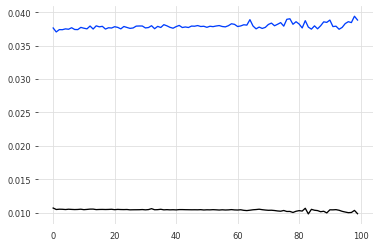

In [122]:
import matplotlib.pyplot as plt

plt.plot(history_LSTM.history['loss'])

plt.plot(history_LSTM.history['val_loss'])


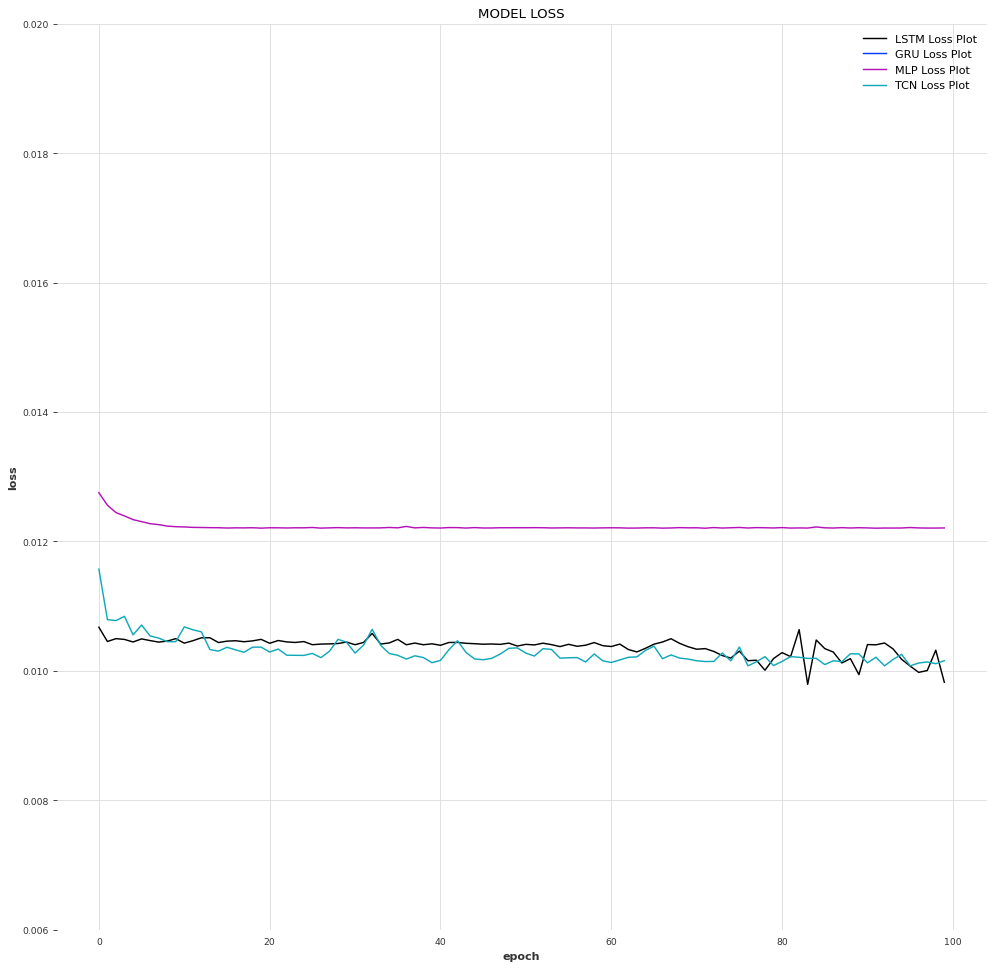

In [123]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 15), dpi=80)
# "Loss"
plt.plot(history_LSTM.history['loss'])
#plt.plot(history_LSTM.history['val_loss'])
plt.plot(history_gru.history['loss'])
#plt.plot(history_gru.history['val_loss'])
plt.plot(history_mlp.history['loss'])
#plt.plot(history_mlp.history['val_loss'])
plt.plot(tcn_history.history['loss'])
#plt.plot(tcn_history.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0.006, 0.020)
plt.legend(['LSTM Loss Plot', 'GRU Loss Plot', 'MLP Loss Plot', 'TCN Loss Plot'], loc='upper right')
plt.show()

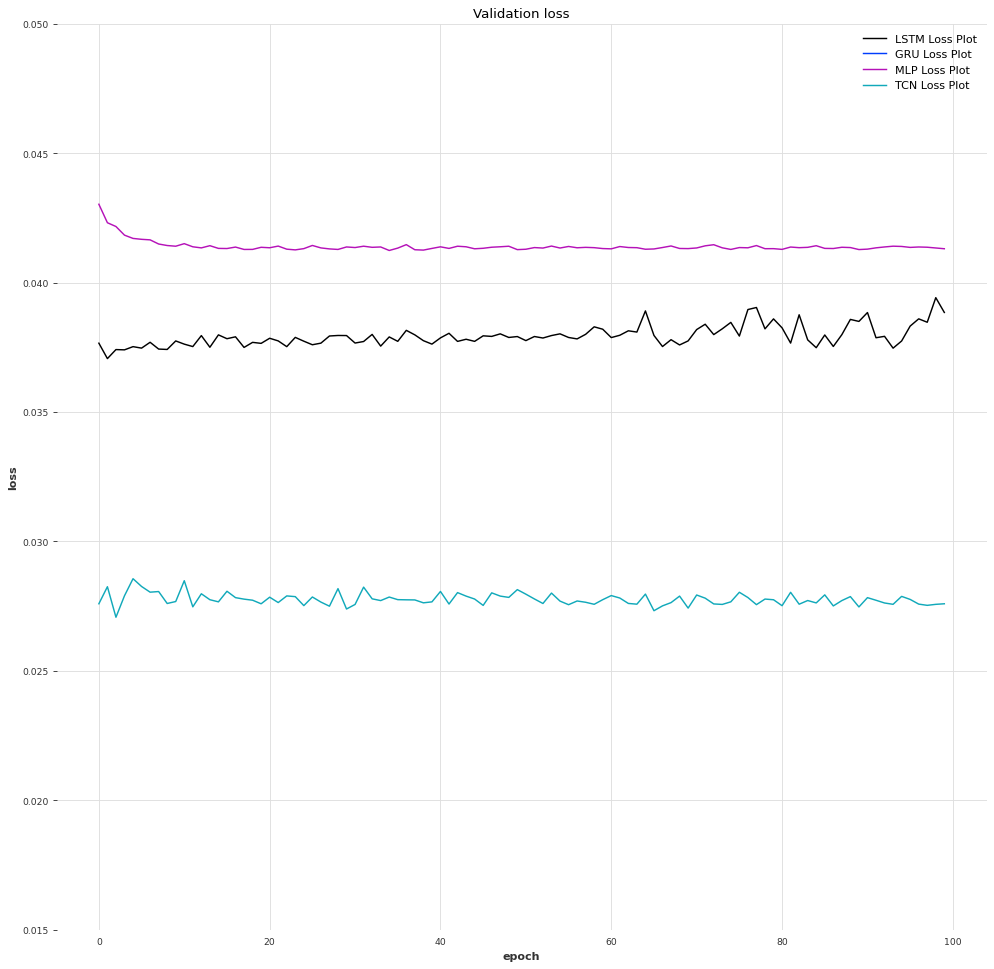

In [124]:
import matplotlib.pyplot as plt
figure(figsize=(15, 15), dpi=80)
# "Loss"
#plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
#plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
#plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
#plt.plot(tcn_history.history['loss'])
plt.plot(tcn_history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0.015, 0.050)
plt.legend(['LSTM Loss Plot', 'GRU Loss Plot', 'MLP Loss Plot', 'TCN Loss Plot'], loc='upper right')
plt.show()

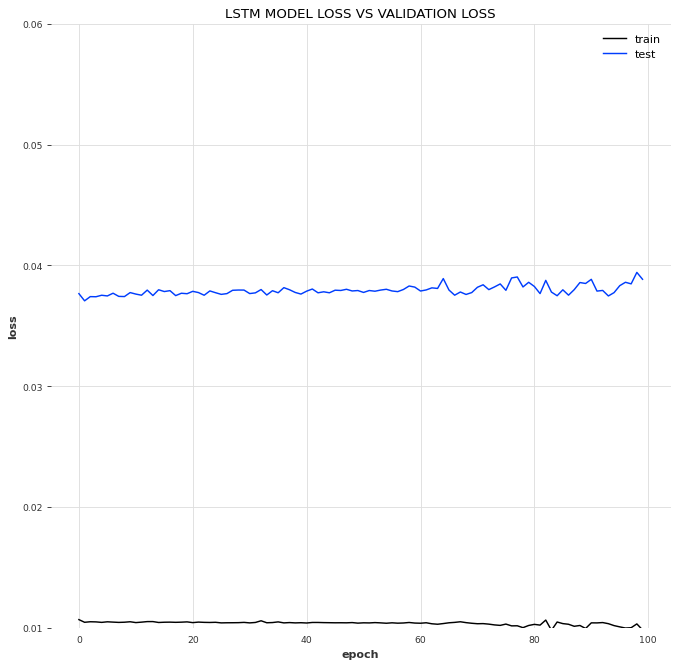

In [125]:
import matplotlib.pyplot as plt
# "Loss"
figure(figsize=(10, 10), dpi=80)
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
#plt.plot(history_LSTM.history['val_loss'])
#plt.plot(history_gru.history['loss'])
#plt.plot(history_gru.history['val_loss'])
#plt.plot(history_mlp.history['loss'])
#plt.plot(history_mlp.history['val_loss'])
#plt.plot(tcn_history.history['loss'])
#plt.plot(tcn_history.history['val_loss'])
plt.title('LSTM MODEL LOSS VS VALIDATION LOSS')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['LSTM Loss Plot', 'GRU Loss Plot', 'MLP Loss Plot', 'TCN Loss Plot'], loc='upper right')
plt.ylim(0.010, 0.060)
plt.legend(['train', 'test'])
plt.show()

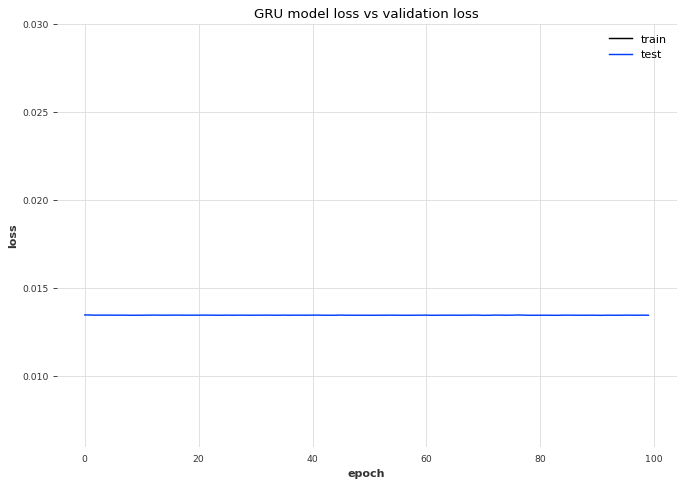

In [126]:
import matplotlib.pyplot as plt
# "Loss"
#plt.plot(history_LSTM.history['loss'])
#plt.plot(history_LSTM.history['val_loss'])
figure(figsize=(10, 7), dpi=80)

plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
#plt.plot(history_gru.history['val_loss'])
#plt.plot(history_mlp.history['loss'])
#plt.plot(history_mlp.history['val_loss'])
#plt.plot(tcn_history.history['loss'])
#plt.plot(tcn_history.history['val_loss'])
plt.title('GRU model loss vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0.006, 0.030)
#plt.legend(['LSTM Loss Plot', 'GRU Loss Plot', 'MLP Loss Plot', 'TCN Loss Plot'], loc='upper right')
plt.legend(['train', 'test'])
plt.show()

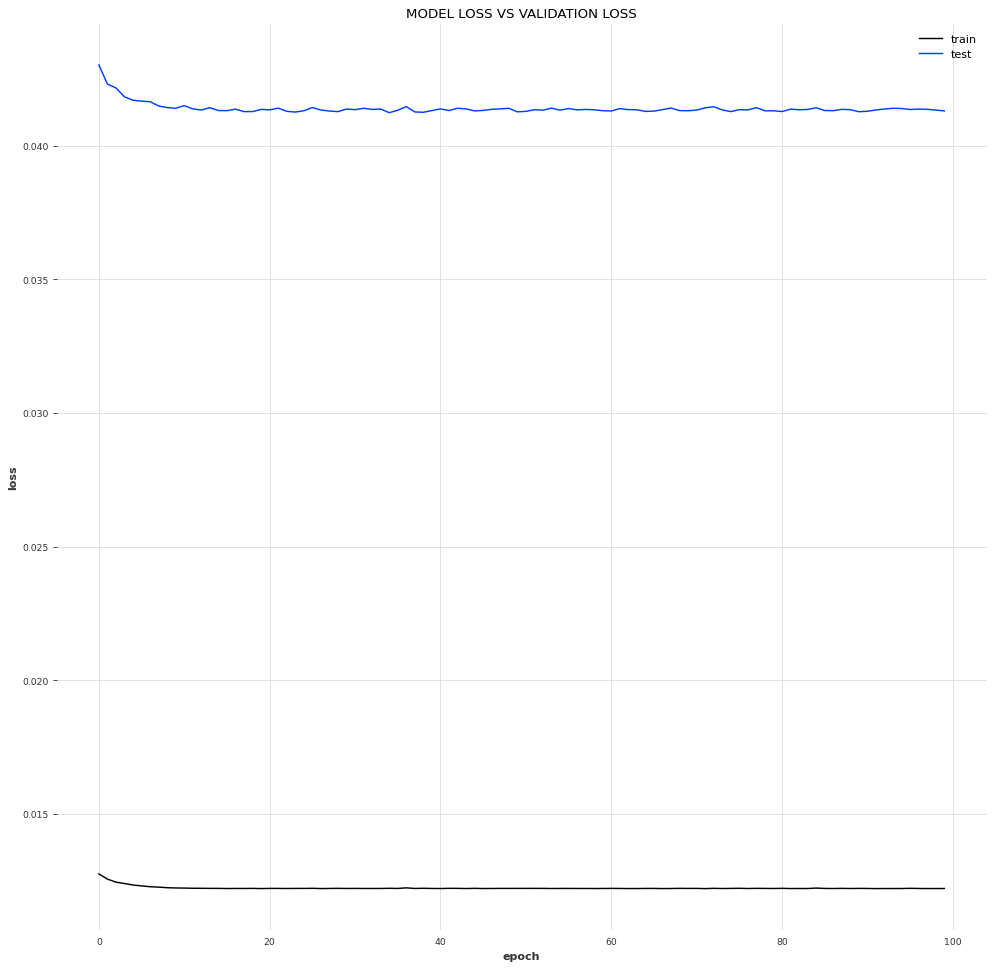

In [147]:
import matplotlib.pyplot as plt
# "Loss"
figure(figsize=(15, 15), dpi=80)

#plt.plot(history_LSTM.history['loss'])
#plt.plot(history_LSTM.history['val_loss'])
#plt.plot(history_gru.history['loss'])
#plt.plot(history_gru.history['val_loss'])
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
#plt.plot(history_mlp.history['val_loss'])
#plt.plot(tcn_history.history['loss'])
#plt.plot(tcn_history.history['val_loss'])
plt.title('MODEL LOSS VS VALIDATION LOSS')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.010, 0.040)

#plt.legend(['LSTM Loss Plot', 'GRU Loss Plot', 'MLP Loss Plot', 'TCN Loss Plot'], loc='upper right')
plt.legend(['train', 'test'])
plt.show()

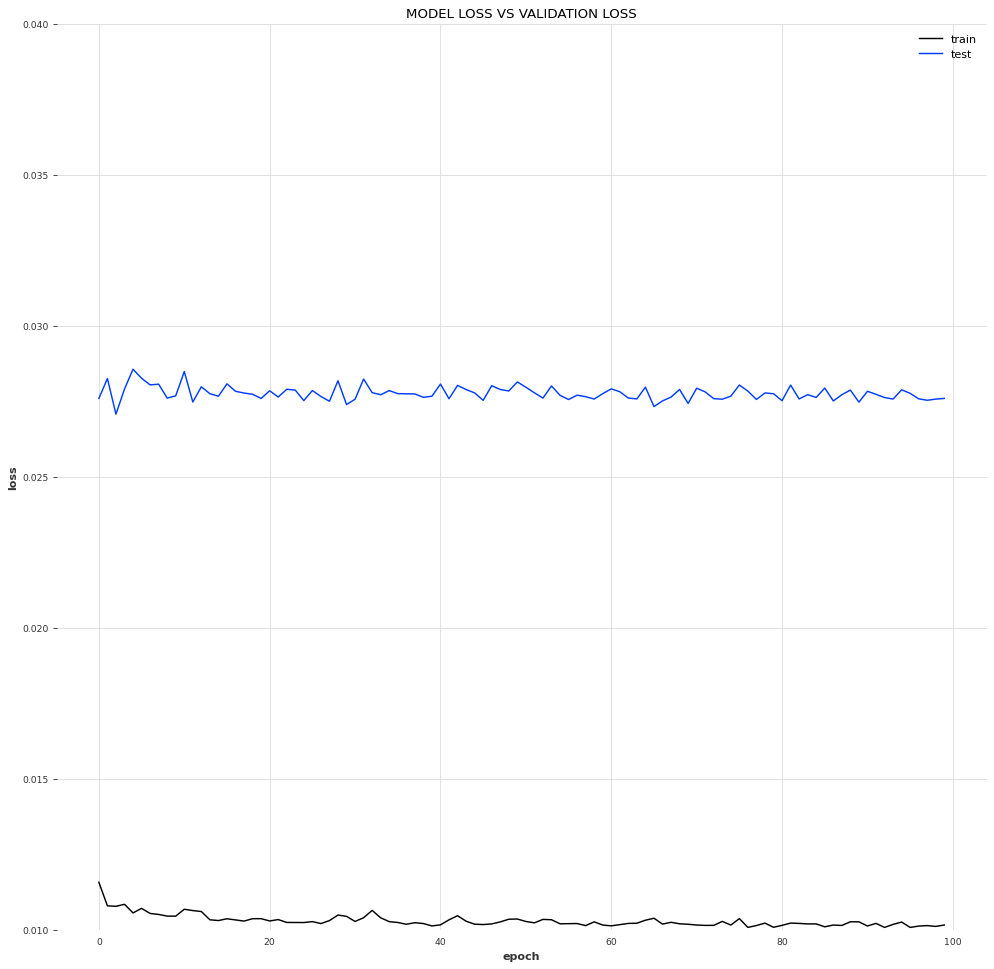

In [128]:
import matplotlib.pyplot as plt
# "Loss"
figure(figsize=(15, 15), dpi=80)

#plt.plot(history_LSTM.history['loss'])
#plt.plot(history_LSTM.history['val_loss'])
#plt.plot(history_gru.history['loss'])
#plt.plot(history_gru.history['val_loss'])
#plt.plot(history_mlp.history['loss'])
#plt.plot(history_mlp.history['val_loss'])
plt.plot(tcn_history.history['loss'])
plt.plot(tcn_history.history['val_loss'])

#plt.plot(tcn_history.history['val_loss'])
plt.title('MODEL LOSS VS VALIDATION LOSS')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0.0100, 0.0400)
#plt.legend(['LSTM Loss Plot', 'GRU Loss Plot', 'MLP Loss Plot', 'TCN Loss Plot'], loc='upper right')
plt.legend(['train', 'test'])
plt.show()

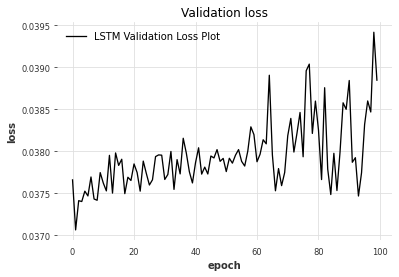

In [129]:
import matplotlib.pyplot as plt
# "Loss"
#plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
#plt.plot(history_gru.history['loss'])
#plt.plot(history_gru.history['val_loss'])
#plt.plot(history_mlp.history['loss'])
#plt.plot(history_mlp.history['val_loss'])
#plt.plot(tcn_history.history['loss'])
#plt.plot(tcn_history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['LSTM Loss Plot', 'GRU Loss Plot', 'MLP Loss Plot', 'TCN Loss Plot'], loc='upper right')
plt.legend(['LSTM Validation Loss Plot'])
plt.show()

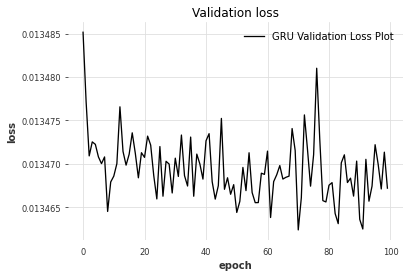

In [130]:
import matplotlib.pyplot as plt
# "Loss"
#plt.plot(history_LSTM.history['loss'])
#plt.plot(history_LSTM.history['val_loss'])
#plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
#plt.plot(history_mlp.history['loss'])
#plt.plot(history_mlp.history['val_loss'])
#plt.plot(tcn_history.history['loss'])
#plt.plot(tcn_history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['LSTM Loss Plot', 'GRU Loss Plot', 'MLP Loss Plot', 'TCN Loss Plot'], loc='upper right')
plt.legend(['GRU Validation Loss Plot'])
plt.show()

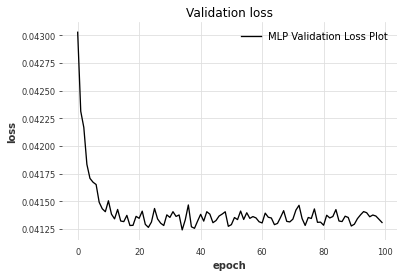

In [131]:
import matplotlib.pyplot as plt
# "Loss"
#plt.plot(history_LSTM.history['loss'])
#plt.plot(history_LSTM.history['val_loss'])
#plt.plot(history_gru.history['loss'])
#plt.plot(history_gru.history['val_loss'])
#plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
#plt.plot(tcn_history.history['loss'])
#plt.plot(tcn_history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['LSTM Loss Plot', 'GRU Loss Plot', 'MLP Loss Plot', 'TCN Loss Plot'], loc='upper right')
plt.legend(['MLP Validation Loss Plot'])
plt.show()

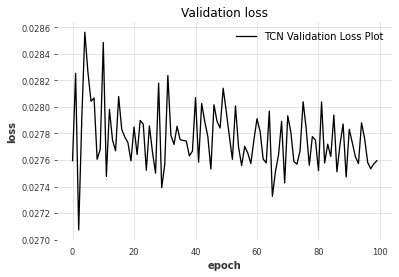

In [132]:
import matplotlib.pyplot as plt
# "Loss"
#plt.plot(history_LSTM.history['loss'])
#plt.plot(history_LSTM.history['val_loss'])
#plt.plot(history_gru.history['loss'])
#plt.plot(history_gru.history['val_loss'])
#plt.plot(history_mlp.history['loss'])
#plt.plot(history_mlp.history['val_loss'])
#plt.plot(tcn_history.history['loss'])
plt.plot(tcn_history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['LSTM Loss Plot', 'GRU Loss Plot', 'MLP Loss Plot', 'TCN Loss Plot'], loc='upper right')
plt.legend(['TCN Validation Loss Plot'])
plt.show()

In [133]:
# for i in range(4):
result_matrix = {}
result_matrix["LSTM_accuracy"] = LSTM_accuracy
result_matrix["GRU_accuracy"] = GRU_accuracy
result_matrix["MLP_accuracy"] = MLP_accuracy
result_matrix["TCN_accuracy"] = TCN_accuracy

   


In [134]:
result_matrix

{'GRU_accuracy': 0.9565217391304348,
 'LSTM_accuracy': 0.8324324324324325,
 'MLP_accuracy': 0.9577464788732394,
 'TCN_accuracy': 0.97265625}

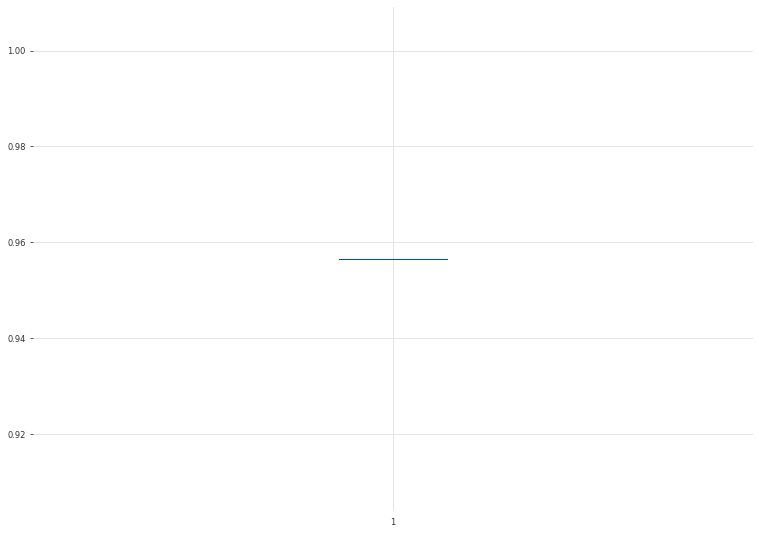

In [135]:

# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
 
data = [GRU_accuracy]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

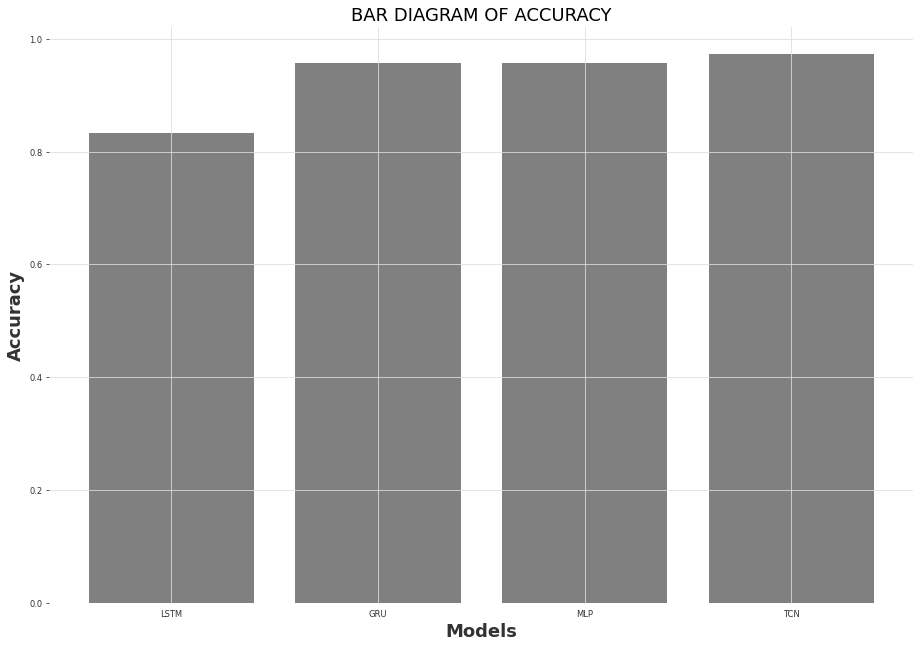

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
MODEL = ['LSTM', 'GRU', 'MLP', 'TCN']
scores = [LSTM_accuracy,GRU_accuracy,MLP_accuracy,TCN_accuracy]
ax.bar(MODEL,scores, color = ['grey', 'grey', 'grey', 'grey'])
ax.set_ylabel('Accuracy',fontsize= 18)
ax.set_xlabel('Models',fontsize= 18)
ax.set_title('BAR DIAGRAM OF ACCURACY',fontsize= 18)
#for i, v in enumerate(scores):
 # ax.text( i ,v + 1, v, color='blue', fontweight='bold')
plt.savefig('barplot_1.png',dpi=200, format='png', bbox_inches='tight')
plt.show()